# Drug Classification using Artificial Neural Network
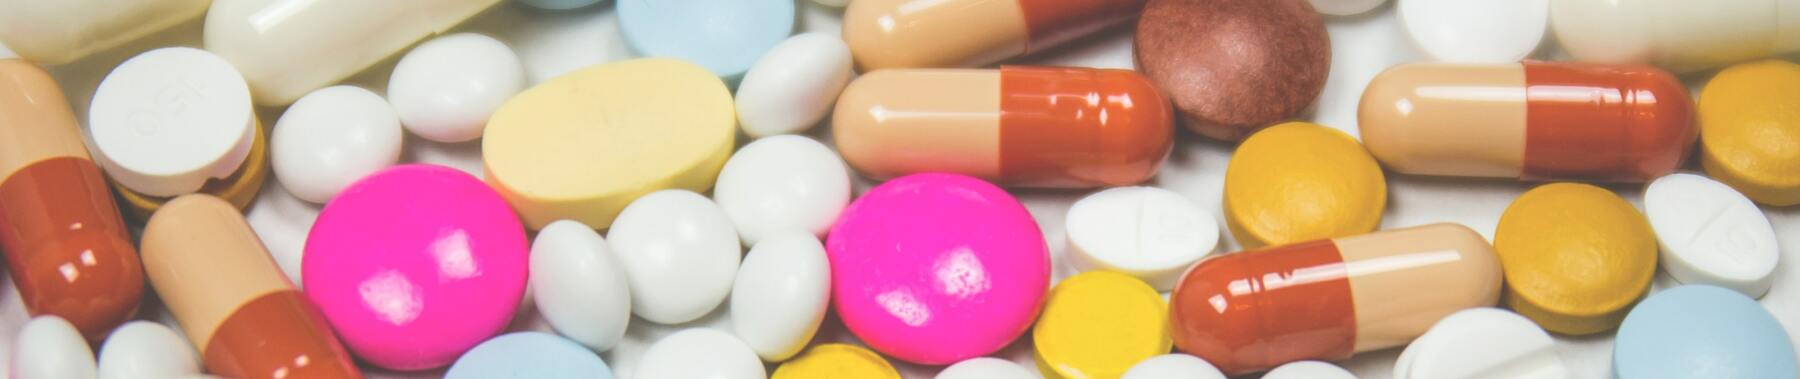
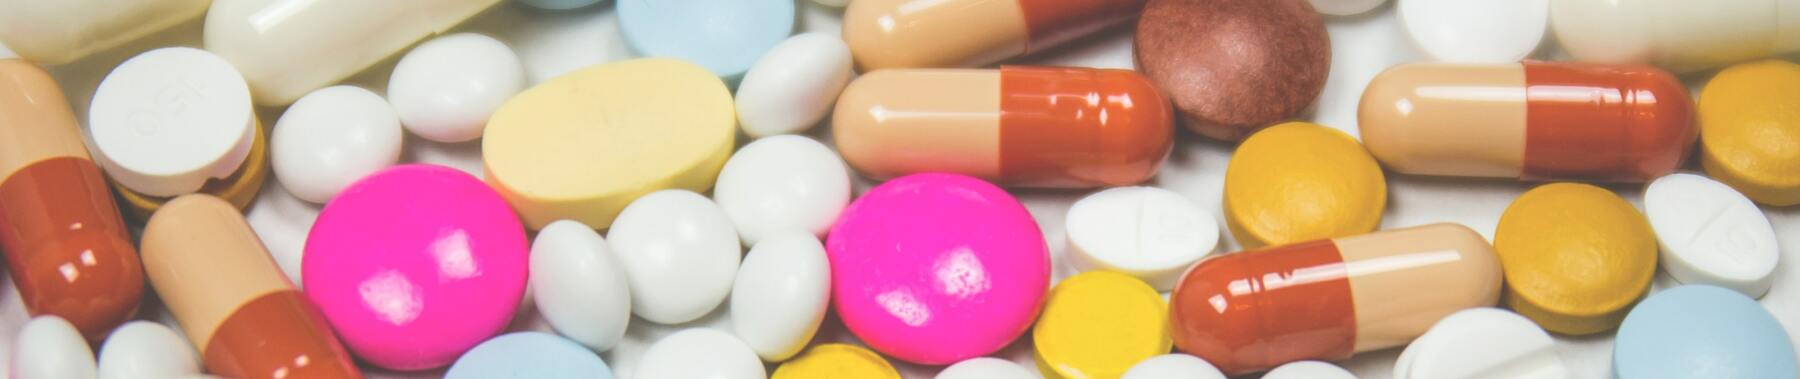

In [605]:
import numpy as np
import pandas as pd
import missingno as m
import plotly.express as px
import tensorflow as tf

In [606]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [607]:
df.shape

(200, 6)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [609]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Data Cleaning

<AxesSubplot:>

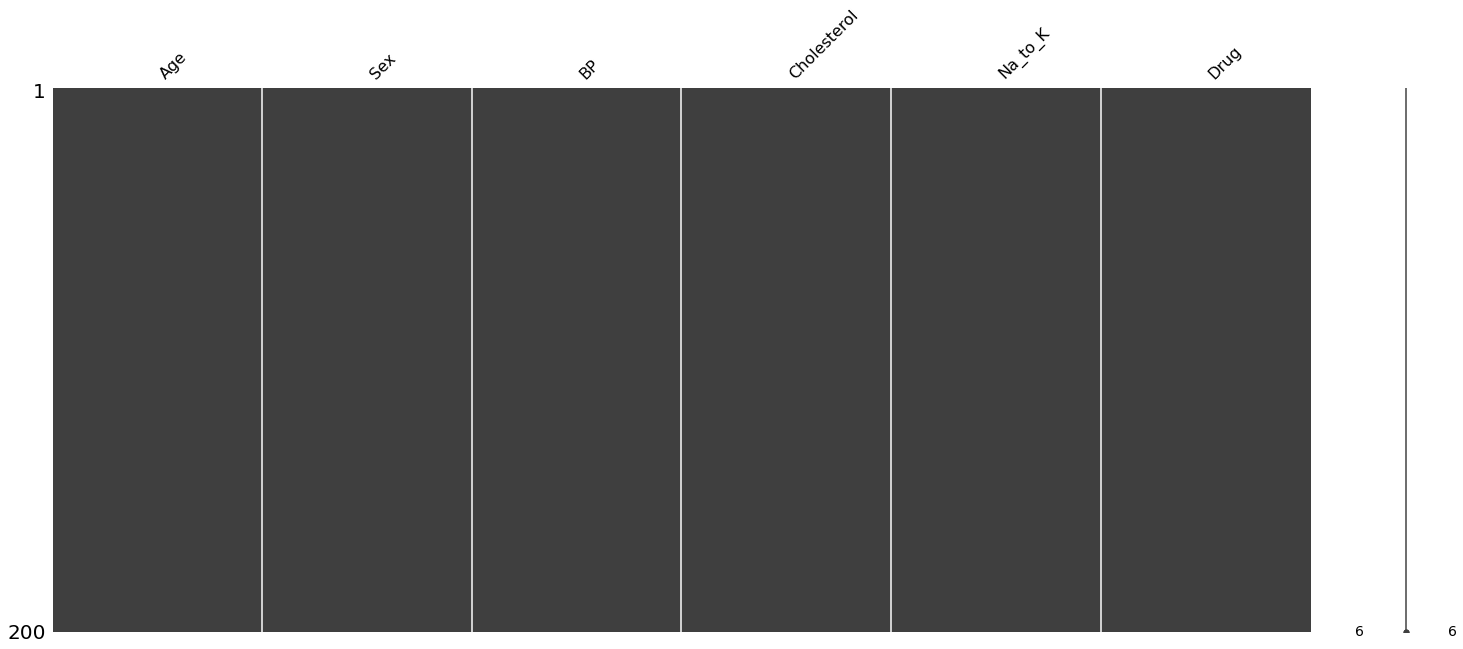

In [610]:
m.matrix(df)

### Data is Already Cleaned

# Univariate, Bivariate and Multivariate Analysis

In [611]:
import plotly.express as px

fig = px.histogram(df, x="Drug",title='Drug Used')
fig.show()

In [644]:
import plotly.figure_factory as ff

hist_data = [df['Age']]
group_labels = ['Age'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [646]:
import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Histogram(x=df['Age']))
fig.add_trace(go.Histogram(x=df['Na_to_K']))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [647]:
import plotly.express as px

fig = px.histogram(df, x="Cholesterol",color='Drug',title='Cholesterol vs Drug')
fig.show()

In [648]:
fig = px.histogram(df, x="BP",color='Drug', title='BP vs Drug')
fig.show()

In [619]:
fig = px.scatter(df, x="Age", y="Na_to_K",color="Drug")
fig.show()

In [649]:
fig = px.scatter(df, x="Age", y="Na_to_K",
	         size="Age", color="Drug",
                 hover_name="Cholesterol", log_x=True, size_max=60,title='Age vs Na_to_K vs Drug plot')
fig.show()

In [650]:
fig = px.box(df, y="BP",x='Age',color='Sex',points='all',title='BP and Age with Sex')
fig.show()

In [651]:
fig = px.histogram(df, x="Age",color='Drug',title='Age vs Drug plot')
fig.show()

In [620]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df1=df

# Making Dummy Variables

In [625]:
df1 = pd.get_dummies(df)

In [626]:
df1.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0


# Feature Scaling 

In [627]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['Age','Na_to_K']
df1[num_vars] = scaler.fit_transform(df1[num_vars])

# Heatmap

<AxesSubplot:>

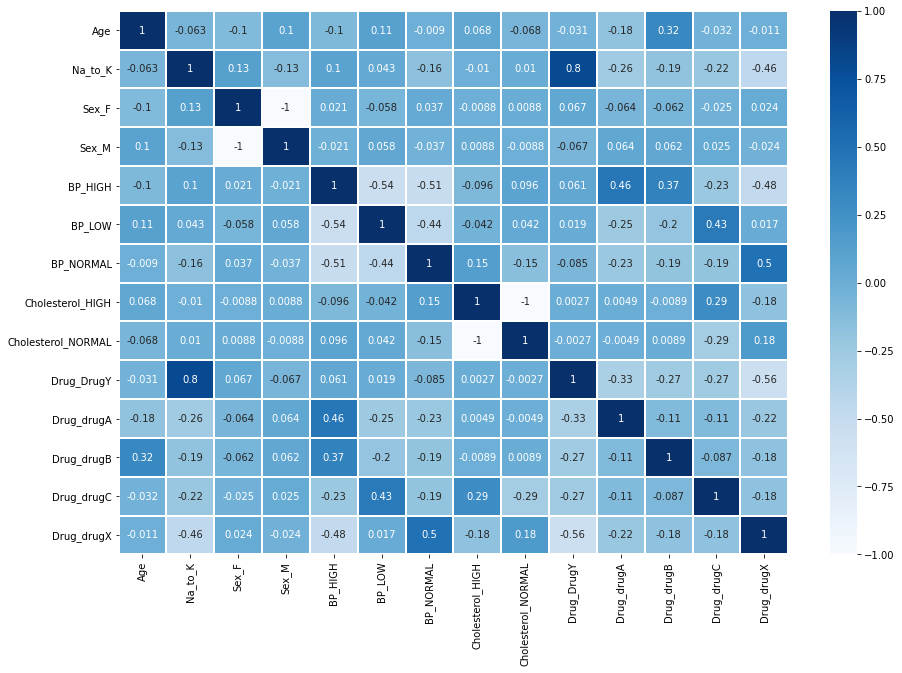

In [654]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True, linewidth=1,cmap='Blues')

In [629]:
df1.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,0.135593,0.596848,1,0,1,0,0,1,0,1,0,0,0,0
1,0.542373,0.213397,0,1,0,1,0,1,0,0,0,0,1,0
2,0.542373,0.120239,0,1,0,1,0,1,0,0,0,0,1,0
3,0.220339,0.047814,1,0,0,0,1,1,0,0,0,0,0,1
4,0.779661,0.368191,1,0,0,1,0,1,0,1,0,0,0,0


# X and y Split

In [630]:
X = df1[['Age','Na_to_K','Sex_F','Sex_M','BP_HIGH','BP_LOW','BP_NORMAL','Cholesterol_HIGH','Cholesterol_NORMAL']].values
y=df1[['Drug_DrugY','Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX']].values

# Train Test Split

In [631]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building ANN Architecture 

## ANN with 2 hidden layers

In [632]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=15, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [633]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [634]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 400)

Epoch 1/400
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 798us/step - loss: 0.6751 - accuracy: 0.2625
Epoch 2/400
5/5 [==============================] - 0s 997us/step - loss: 0.6663 - accuracy: 0.2875
Epoch 3/400
5/5 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.3000
Epoch 4/400
5/5 [==============================] - 0s 997us/step - loss: 0.6490 - a

5/5 [==============================] - 0s 997us/step - loss: 0.3089 - accuracy: 0.6000
Epoch 75/400
5/5 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.6000
Epoch 76/400
5/5 [==============================] - 0s 797us/step - loss: 0.3048 - accuracy: 0.6062
Epoch 77/400
5/5 [==============================] - 0s 798us/step - loss: 0.3027 - accuracy: 0.6250
Epoch 78/400
5/5 [==============================] - 0s 998us/step - loss: 0.3006 - accuracy: 0.6313
Epoch 79/400
5/5 [==============================] - 0s 798us/step - loss: 0.2987 - accuracy: 0.6438
Epoch 80/400
5/5 [==============================] - 0s 998us/step - loss: 0.2966 - accuracy: 0.6500
Epoch 81/400
5/5 [==============================] - 0s 796us/step - loss: 0.2947 - accuracy: 0.6500
Epoch 82/400
5/5 [==============================] - 0s 997us/step - loss: 0.2926 - accuracy: 0.6562
Epoch 83/400
5/5 [==============================] - 0s 997us/step - loss: 0.2909 - accuracy: 0.6625
Epoch 84/400
5/

5/5 [==============================] - 0s 997us/step - loss: 0.1711 - accuracy: 0.8750
Epoch 156/400
5/5 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.8750
Epoch 157/400
5/5 [==============================] - 0s 798us/step - loss: 0.1685 - accuracy: 0.8813
Epoch 158/400
5/5 [==============================] - 0s 964us/step - loss: 0.1673 - accuracy: 0.8813
Epoch 159/400
5/5 [==============================] - 0s 997us/step - loss: 0.1661 - accuracy: 0.8813
Epoch 160/400
5/5 [==============================] - 0s 997us/step - loss: 0.1649 - accuracy: 0.8875
Epoch 161/400
5/5 [==============================] - 0s 997us/step - loss: 0.1638 - accuracy: 0.8875
Epoch 162/400
5/5 [==============================] - 0s 798us/step - loss: 0.1630 - accuracy: 0.8875
Epoch 163/400
5/5 [==============================] - 0s 997us/step - loss: 0.1614 - accuracy: 0.8875
Epoch 164/400
5/5 [==============================] - 0s 600us/step - loss: 0.1603 - accuracy: 0.8875
Epoch 

5/5 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.9500
Epoch 237/400
5/5 [==============================] - 0s 798us/step - loss: 0.1042 - accuracy: 0.9500
Epoch 238/400
5/5 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9563
Epoch 239/400
5/5 [==============================] - 0s 997us/step - loss: 0.1036 - accuracy: 0.9625
Epoch 240/400
5/5 [==============================] - 0s 997us/step - loss: 0.1028 - accuracy: 0.9625
Epoch 241/400
5/5 [==============================] - 0s 997us/step - loss: 0.1028 - accuracy: 0.9563
Epoch 242/400
5/5 [==============================] - 0s 996us/step - loss: 0.1019 - accuracy: 0.9625
Epoch 243/400
5/5 [==============================] - 0s 997us/step - loss: 0.1013 - accuracy: 0.9625
Epoch 244/400
5/5 [==============================] - 0s 998us/step - loss: 0.1010 - accuracy: 0.9563
Epoch 245/400
5/5 [==============================] - 0s 997us/step - loss: 0.1008 - accuracy: 0.9688
Epoch 24

5/5 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9875
Epoch 319/400
5/5 [==============================] - 0s 997us/step - loss: 0.0746 - accuracy: 0.9875
Epoch 320/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9875
Epoch 321/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9875
Epoch 322/400
5/5 [==============================] - 0s 997us/step - loss: 0.0737 - accuracy: 0.9875
Epoch 323/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9875
Epoch 324/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9875
Epoch 325/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9875
Epoch 326/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9875
Epoch 327/400
5/5 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9875
Epoch 328/400
5/5 [=

5/5 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9937


In [635]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


# Epoch Loss and Accuracy Plot

In [666]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=history.history['accuracy'], name='Accuracy',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=history.history['loss'], name = 'Loss',
                         line=dict(color='firebrick', width=5)))

# Prediction in Test Set

In [637]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [638]:
y_pred = np.where(y_pred == 'False',0, y_pred)

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Prediction

In [664]:
y_pred

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [658]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy :  97.5 %


## This ANN model can Successfully Classified Drugs with an Accuracy of 97.5%